In [1]:
# Importing necessary libraries

from stoneforge.petrophysics.water_saturation import archie, simandoux, indonesia, fertl
from stoneforge.petrophysics.shale_volume import vshale_larionov_old
from stoneforge.petrophysics.porosity import density_porosity
from stoneforge.petrophysics.permeability import timur, coates_dumanoir, coates
from stoneforge import datasets
from stoneforge.vis import wellplot

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
# Accessing Internal Dataframe for DP1 Well

DATA = datasets.NPRAlaska()
DATA.dp1
data_DP1, units_DP1 = DATA.dp1.dataframe(DATA.dp1.data_obj.data)
data_DP1

,DEPT,SP,ILD,ILM,LL8,GR,CALI,DRHO,RHOB,NPHI,DT
0,100.0,-999.0,-999.0,-999.0,-999.0,25.1383,-999.0,-999.0,-999.0,-999.0,-999.0
1,100.5,-999.0,-999.0,-999.0,-999.0,24.7342,-999.0,-999.0,-999.0,-999.0,-999.0
2,101.0,-999.0,-999.0,-999.0,-999.0,24.9611,-999.0,-999.0,-999.0,-999.0,-999.0
3,101.5,-999.0,-999.0,-999.0,-999.0,25.1880,-999.0,-999.0,-999.0,-999.0,-999.0
4,102.0,-999.0,-999.0,-999.0,-999.0,25.4148,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
15688,7944.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
15689,7944.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
15690,7945.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
15691,7945.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
# Accessing Internal Dataframe units for DP1 Well

print(units_DP1)

{'DEPT': 'F', 'SP': 'MV', 'ILD': 'OHMM', 'ILM': 'OHMM', 'LL8': 'OHMM', 'GR': 'GAPI', 'CALI': 'IN', 'DRHO': 'G/C3', 'RHOB': 'G/C3', 'NPHI': '%', 'DT': 'US/F'}


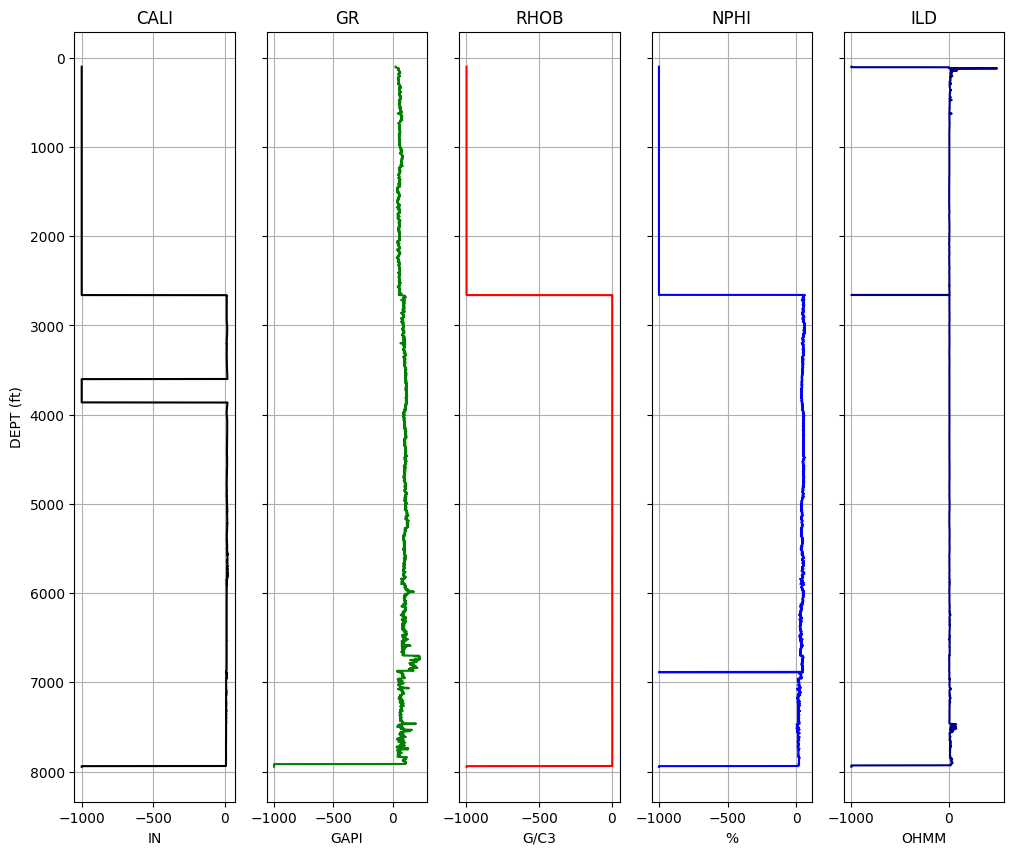

In [4]:
# Viewing Well Log Data

curves = ["CALI","GR","RHOB","NPHI",'ILD']
units = []
for c in curves:
    units.append(units_DP1[c])

color = ["k","g","r","b","navy"]

wellplot(data_DP1,"DEPT",curves, color, units, d_unit='ft')

In [5]:
# Removing specific values
# OBS: you can use "df.dropna(inplace=True)" to remove all np.nan values

data_DP1_c = data_DP1[~data_DP1.isin([-999.0]).any(axis=1)]
data_DP1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,DRHO,RHOB,NPHI,DT
5120,2660.0,-60.7408,3.3844,5.0310,5.1698,74.0426,12.9052,0.1493,2.4740,57.7686,117.7726
5121,2660.5,-56.1106,3.2822,4.8012,4.8838,76.9846,13.1302,0.1240,2.3211,57.8218,119.8360
5122,2661.0,-53.9129,3.4204,4.5819,4.6136,78.1111,13.1296,0.0844,2.2336,56.2045,122.1953
5123,2661.5,-51.8803,3.7083,4.3727,4.3964,79.2601,13.1396,0.0988,2.2560,55.8004,124.3410
5136,2668.0,-46.1159,4.3805,4.2128,4.4842,100.0704,14.4418,0.1167,2.2145,55.1738,121.9815
...,...,...,...,...,...,...,...,...,...,...,...
15626,7913.0,-25.3680,23.4500,27.6324,72.9849,101.1833,8.1639,0.0142,2.7215,15.5474,59.3189
15627,7913.5,-24.9876,22.3949,26.8287,70.6988,104.7405,8.1803,0.0106,2.7180,16.2522,58.8358
15628,7914.0,-24.5709,21.3872,26.1230,72.7765,108.2053,8.1815,0.0070,2.7112,16.5995,59.0097
15629,7914.5,-24.4368,20.4249,25.0137,79.3360,107.8603,8.1826,0.0034,2.7018,16.9890,59.7747


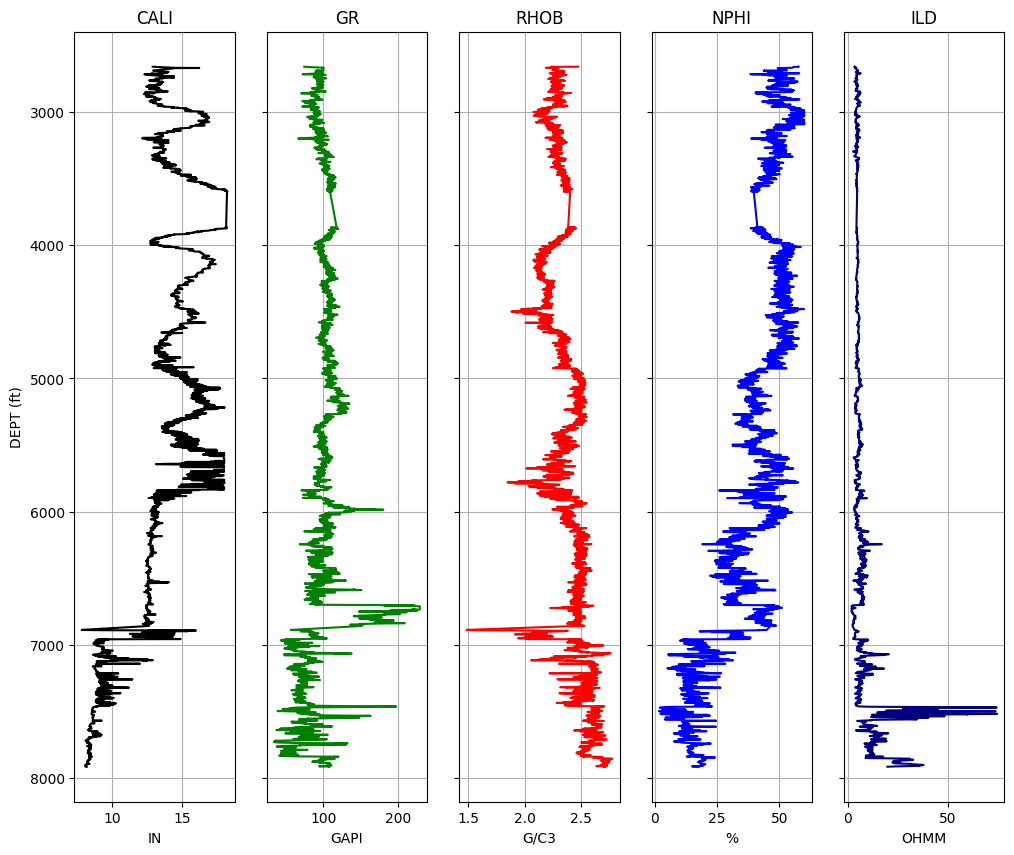

In [6]:
# Viewing Cleaned Well Log Data

wellplot(data_DP1_c,"DEPT",curves, color, units, d_unit='ft')

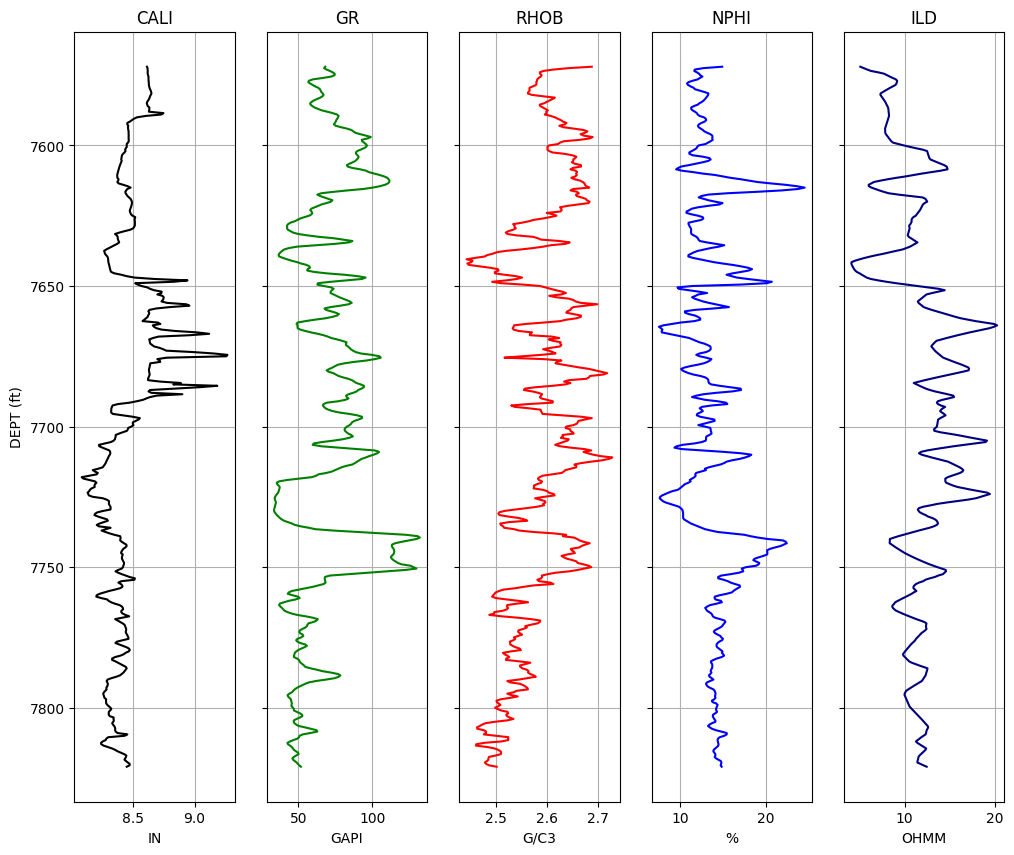

In [7]:
# Taking specific range in depth for analysis (ledge sandstone interval)

LEDGE_SANDSTONE = data_DP1_c[data_DP1_c['DEPT'].between(7572, 7821)]
wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units, d_unit='ft')

In [8]:
# VSH Calculations

GR = np.array(LEDGE_SANDSTONE["GR"])

GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

VSH = vshale_larionov_old(gr=GR,grmin=GR_min,grmax=GR_max)

GR_min: 42.62566 |GR_max: 97.14877999999999


In [10]:
# PHI Calculations

NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])

PHID = density_porosity(rhob=RHOB)

In [11]:
# SW Calculations

ILD = np.array(LEDGE_SANDSTONE["ILD"])

SW = np.array(archie(rt=ILD,phi=PHID))

LEDGE_SANDSTONE_SW = pd.DataFrame(SW)

In [12]:
# K (Permeability in mD) Calculations | from stoneforge.petrophysics.permeability import timur, coates_dumanoir, coates
K = {
    "DEPTH":LEDGE_SANDSTONE["DEPT"],
    "timur": timur(phi=PHID, sw=SW),
    "coates_dumanoir": coates_dumanoir(resd=ILD, phi=PHID),
    "coates": coates(phi=PHID, sw=SW)
}


phi must be in (0, 1) as a fraction.
swirr must be in (0, 1) as a fraction.


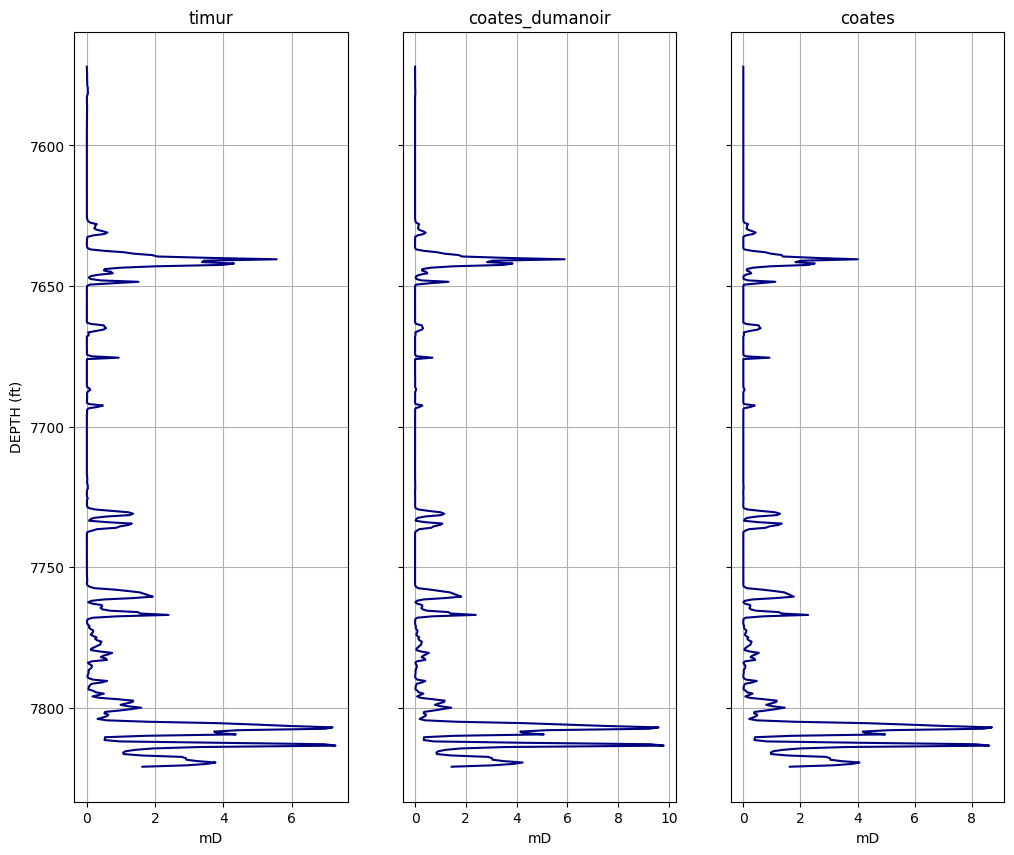

In [14]:
# Plotting K results

curves = ["timur","coates_dumanoir","coates"]
units = ["mD","mD","mD"]
color = ["navy","navy","navy"]
 
wellplot(K,"DEPTH",curves, color, units, d_unit='ft')